In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('SalaryData.csv')
df.head()
#Мы работаем с датасетом специально сделаным для обучения( данные - фиктивные )
#Age - Возраст
#Gender - Пол
#Education level - Уровень образования
#Job title - Должность
#Years of experience - Стаж 
#Salary - Зарплата
#
#

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


<Axes: xlabel='Job Title', ylabel='count'>

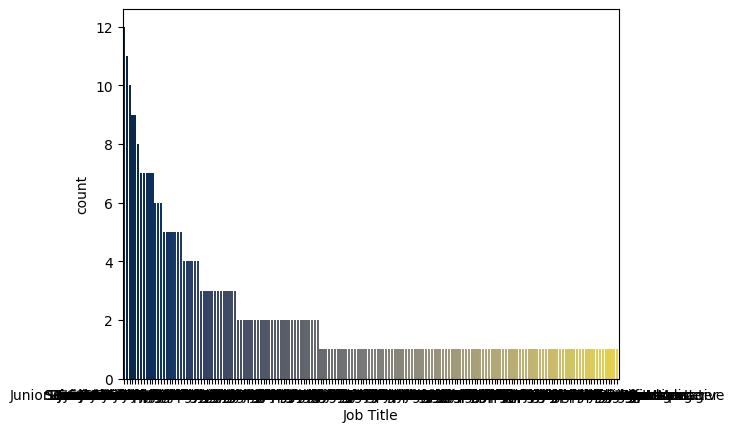

In [4]:
xx = df['Job Title'].value_counts().reset_index()
sns.barplot(x = "Job Title",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Education Level', ylabel='count'>

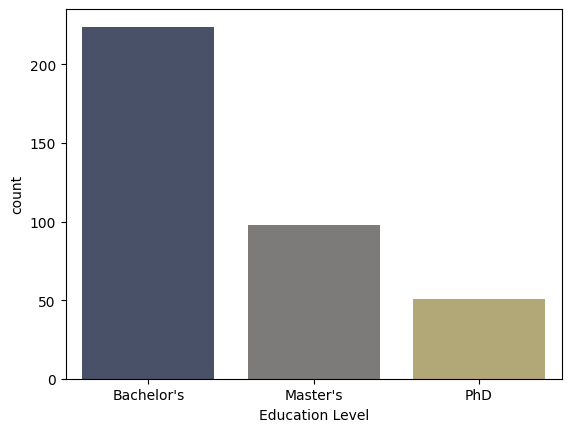

In [3]:
xx = df['Education Level'].value_counts().reset_index()
sns.barplot(x = "Education Level",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Age', ylabel='count'>

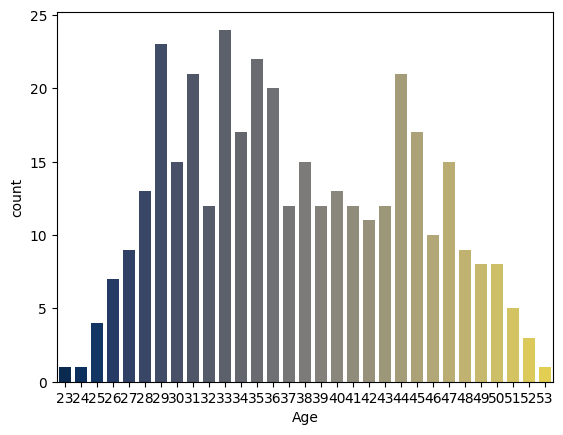

In [3]:
xx = df['Age'].value_counts().reset_index()
sns.barplot(x = "Age",y = "count",data=xx,palette = "cividis")

<Axes: xlabel='Gender', ylabel='count'>

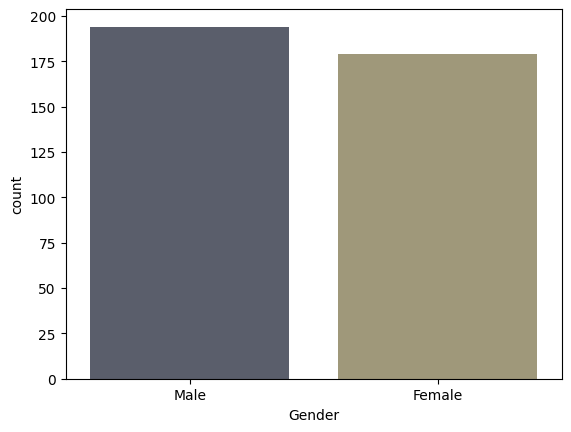

In [4]:
xx = df['Gender'].value_counts().reset_index()
sns.barplot(x = "Gender",y = "count",data=xx,palette = "cividis")

In [5]:
new_df = df[['Age','Years of Experience','Salary']]

X = new_df.iloc[:,:-1].values
y = new_df.iloc[:,2].values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       30000       0.00      0.00      0.00         0
       35000       1.00      0.33      0.50         3
       40000       1.00      0.86      0.92         7
       45000       0.22      1.00      0.36         2
       50000       0.00      0.00      0.00         3
       55000       0.00      0.00      0.00         4
       60000       0.80      0.80      0.80         5
       65000       0.00      0.00      0.00         3
       70000       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         2
       85000       0.50      0.67      0.57         3
       90000       0.25      0.20      0.22         5
       95000       0.45      0.83      0.59         6
      100000       0.00      0.00      0.00         2
      105000       0.00      0.00      0.00         2
      110000       0.00      0.00      0.00         3
      120000       0.00    

In [10]:
#2.дерево решений

In [11]:
def mse(true,pred):
    return np.mean(np.square(true-pred))

In [12]:
X = new_df[['Age','Years of Experience']]
Y = new_df[['Salary']]

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X, Y)

DecisionTreeRegressor(random_state=1)

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 150))
fig = plot_tree(tree, feature_names=['Age','Years of Experience'], filled=True);

In [31]:
# Отчет:

In [32]:
#1.Данные несбалансированные. Целевой класс - Salary(зарплата)

In [ ]:
#2
#
#Accuracy, Precision и Recall - метрики представляющие собой доп информацию о поведении модели.
#
#Accuracy — это показатель, который описывает общую точность предсказания модели по всем классам.
#Данная метрика отвечает на вопрос с какой долей вероятности модель даст точный прогноз.
#В нашем случае, метрика Accuracy дает значени 0,37 или 37%(рассматриваем итоговое значение), что является плохим значением.
#Так как датасет собран из фиктивных значение, то показатель в 37% уже не воспринимается плохо, так как фиктивные данные нельзя
#оценивать как настоящие.
#
#Precision отражает, насколько надежна модель при классификации Positive-меток.
#В нашей выборке значение показателя Precision равны 0.22, 0.25, 0.45, 0.5, 1.   
#Из этого можно сделать вывод, что рассматривая классификации Positive-меток мы получаем не самые лучшие результаты.( причина : фиктивные данные )
#
#
#Recall рассчитывается как отношение числа Positive выборок, корректно классифицированных как Positive, к общему количеству Positive семплов. 
#Recall измеряет способность модели обнаруживать выборки, относящиеся к классу Positive. Чем выше recall, тем больше Positive семплов было найдено.
#В нашей выборке значение показателя Recall равны 0.2, 0.25, 0.33, 0.50, 0.67, 0.75, 0.83, 0.86,1.00.   
#Из этого можно сделать вывод, что рассматривая классификации Recall-меток мы получаем плохие результаты.( причина : фиктивные данные )
#
#Решение о том, следует ли использовать precision или recall, зависит от типа вашей проблемы. 
#Если цель состоит в том, чтобы обнаружить все positive выборки (не заботясь о том, будут ли negative 
#семплы классифицированы как positive), используйте recall. Используйте precision, если ваша задача связана 
#с комплексным предсказанием класса Positive,
#то есть учитывая Negative семплы, которые были ошибочно классифицированы как Positive.
#
#F1-Score – это одна из ключевых метрик, используемых для оценки качества моделей машинного обучения. В отличие от других метрик, 
#F1-Score объединяет в себе две основные метрики: точность (precision) и полноту (recall). Он широко используется в задачах классификации, 
#где важно достичь баланса между точностью предсказаний и полнотой обнаружения данного класса.
#Значение F1-score предоставляет среднее гармоническое между точностью и полнотой.
#Чем ближе значение F1-Score к 1, тем лучше модель справляется с задачей классификации.
#Параметр F1-score можно считать более дастоверным при рассмотрении задачи классификаций.